# pyloess 程序测试

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pyloess

## 1. 1-D序列测试

In [48]:
x = np.linspace(-10, 10, 1000)
y = np.sin(x) + np.random.random(1000) * 0.5

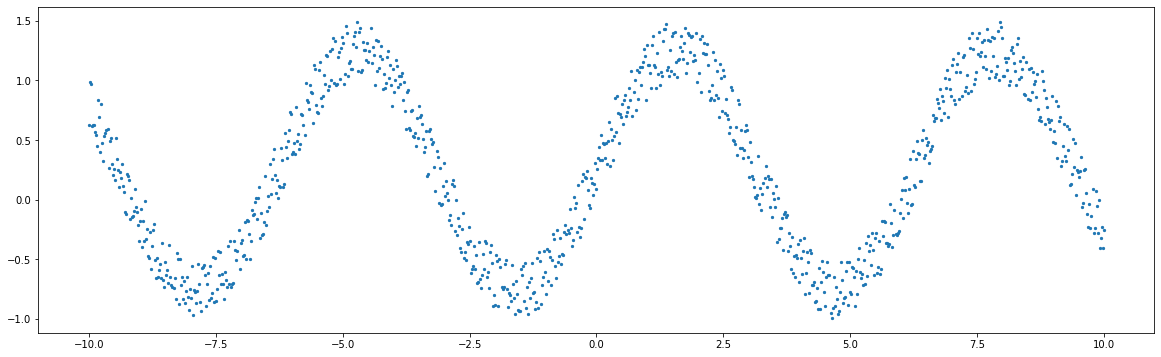

In [49]:
f = plt.figure(figsize=(20,6))
plt.scatter(x, y, s=5)
plt.show()

### 1.1. Smooth_edge对比

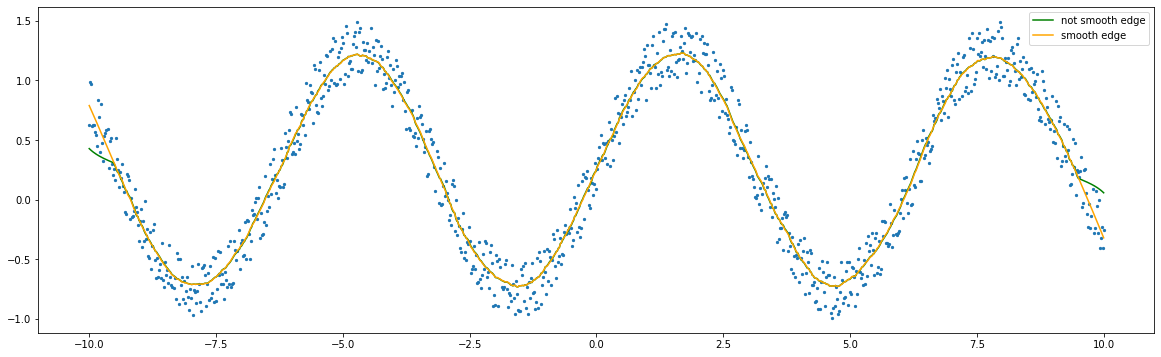

In [50]:
loess = pyloess.LocallyWeightedRegression(k=50)
y_pred1 = loess.PredictWithoutSmooth(x.reshape((-1, 1)), y, x.reshape((-1, 1)))
y_pred2 = loess.PredictWithinSmooth(x.reshape((-1, 1)), y, x.reshape((-1, 1)))

f = plt.figure(figsize=(20,6))
plt.scatter(x, y, s=5)
plt.plot(x, y_pred1, color='green',  label='not smooth edge')
plt.plot(x, y_pred2, color='orange', label='smooth edge')
plt.legend()
plt.show()

### 1.3. 部分预测

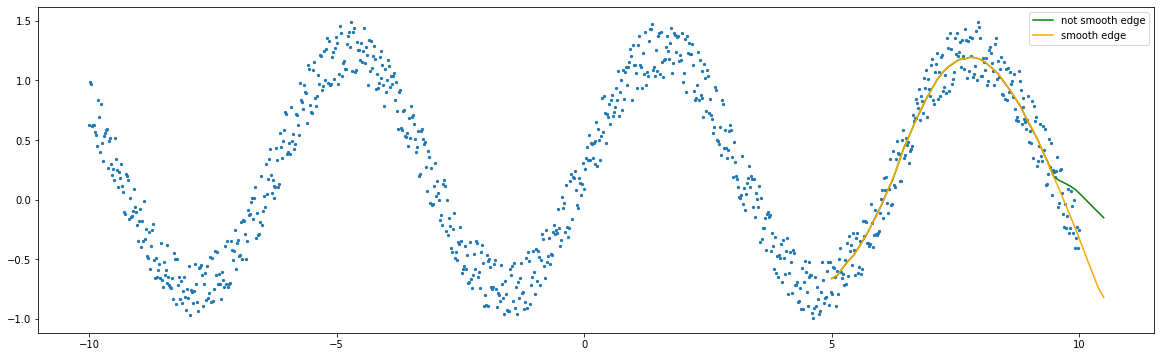

In [51]:
x1 = np.linspace(5, 10.5, 50)
loess = pyloess.LocallyWeightedRegression(k=50)
y_pred1 = loess.PredictWithoutSmooth(x.reshape((-1, 1)), y, x1.reshape((-1, 1)))
y_pred2 = loess.PredictWithinSmooth(x.reshape((-1, 1)), y, x1.reshape((-1, 1)))

f = plt.figure(figsize=(20,6))
plt.scatter(x, y, s=5)
plt.plot(x1, y_pred1, color='green',  label='not smooth edge')
plt.plot(x1, y_pred2, color='orange', label='smooth edge')
plt.legend()
plt.show()

### 1.4 Robust测试

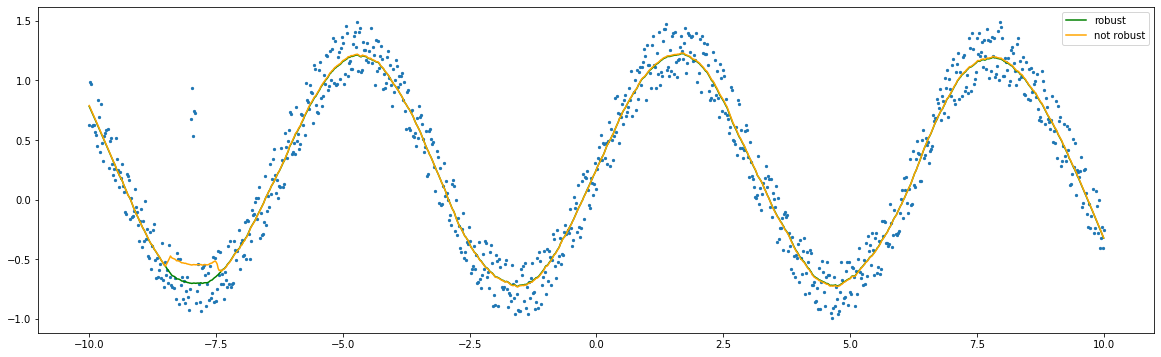

In [52]:
y[100:105] = 1.5 + y[100:105]
loess = pyloess.LocallyWeightedRegression(k=50)

y_pred1 = loess.Fit(x.reshape((-1, 1)), y)
loess.robust = False
y_pred2 = loess.Fit(x.reshape((-1, 1)), y)

f = plt.figure(figsize=(20,6))
plt.scatter(x, y, s=5)
plt.plot(x, y_pred1, color='green',  label='robust')
plt.plot(x, y_pred2, color='orange', label='not robust')
plt.legend()
plt.show()

## 2. 2-D数据测试